In [1]:
import numpy as np
from PIL import Image

# Open the image
image_path = r"C:\Users\acer\Desktop\ED_data\Eye_diseases\Uveitis\images-21.jpeg"
img = Image.open(image_path)

# Convert to numpy array
img_array = np.array(img)

print(f"Shape of the image array: {img_array.shape}")
print(f"Data type of the image array: {img_array.dtype}")

Shape of the image array: (168, 300, 3)
Data type of the image array: uint8


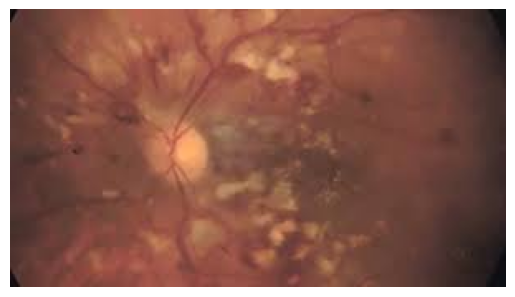

In [3]:
import matplotlib.pyplot as plt

plt.imshow(img_array)
plt.axis('off')  # Hide axes
plt.show()

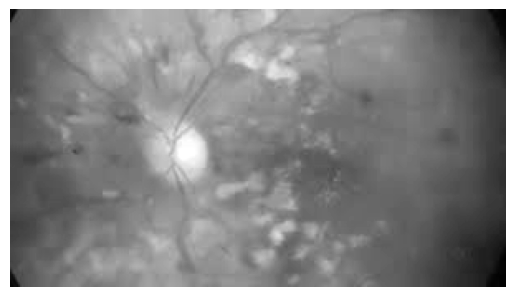

In [7]:
img_channel_0 = img_array[:,:,0]

plt.imshow(img_channel_0, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

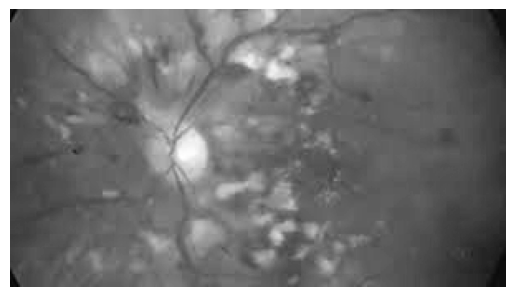

In [10]:
img_channel_1 = img_array[:,:,1]

plt.imshow(img_channel_1, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

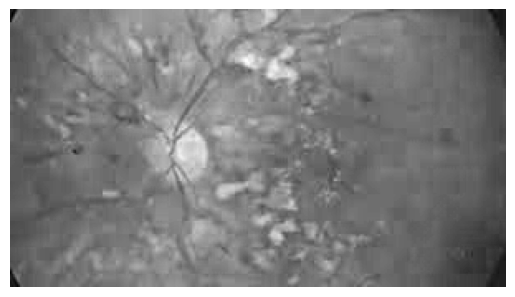

In [11]:
img_channel_2 = img_array[:,:,2]

plt.imshow(img_channel_2, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

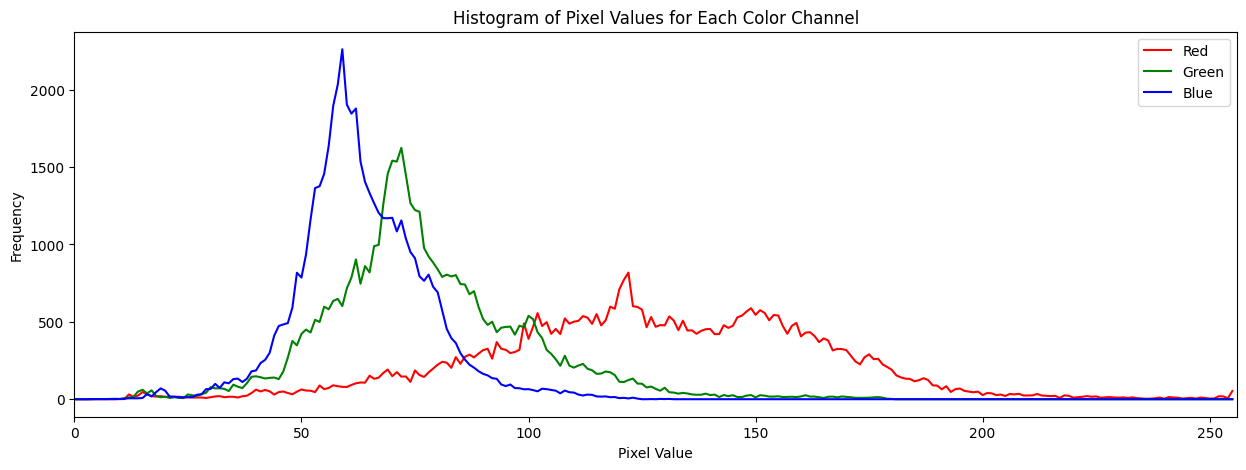

In [13]:
import cv2

plt.figure(figsize=(15, 5))

color = ('r', 'g', 'b')
for i, col in enumerate(color):
    histr = cv2.calcHist([img_array], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])

plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Values for Each Color Channel')
plt.legend(['Red', 'Green', 'Blue'])

plt.show()

In [15]:
import numpy as np

def filter_intensity_range(image_array, lower_bound, upper_bound):

    # Ensure the input is a 2D array
    if image_array.ndim != 2:
        raise ValueError("Input must be a 2D array")
    
    # Create a mask for pixels in the desired range
    mask = (image_array >= lower_bound) & (image_array <= upper_bound)
    
    # Apply the mask to the image
    filtered_array = np.where(mask, image_array, 0)
    
    return filtered_array

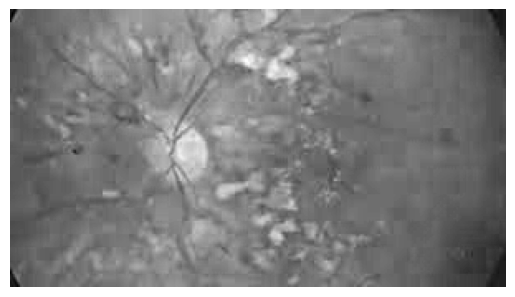

In [20]:
img_channel_2 = img_array[:,:,2]

plt.imshow(img_channel_2, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

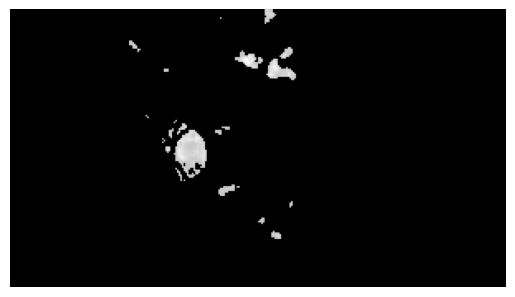

In [19]:
filtered_img_2 = filter_intensity_range(img_channel_2, 100, 255)

plt.imshow(filtered_img_2, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

In [74]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntRangeSlider, HBox, VBox
%matplotlib inline

# Load the RGB image
image_path = r"C:\Users\acer\Desktop\ED_data\Eye_diseases\Uveitis\images-21.jpeg"
img = Image.open(image_path)
img_array = np.array(img)

def filter_rgb_intensity_range(image_array, r_bounds, g_bounds, b_bounds):
    r_mask = (image_array[:,:,0] >= r_bounds[0]) & (image_array[:,:,0] <= r_bounds[1])
    g_mask = (image_array[:,:,1] >= g_bounds[0]) & (image_array[:,:,1] <= g_bounds[1])
    b_mask = (image_array[:,:,2] >= b_bounds[0]) & (image_array[:,:,2] <= b_bounds[1])
    
    combined_mask = r_mask & g_mask & b_mask
    
    filtered_array = np.where(combined_mask[:,:,np.newaxis], image_array, 0)
    
    return filtered_array

def update_plot(r_range, g_range, b_range):
    filtered_img_array = filter_rgb_intensity_range(img_array, r_range, g_range, b_range)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax1.imshow(img_array)
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    ax2.imshow(filtered_img_array)
    ax2.set_title(f'Filtered Image\nR:{r_range}, G:{g_range}, B:{b_range}')
    ax2.axis('off')
    
    plt.show()

r_slider = IntRangeSlider(value=[0, 255], min=0, max=255, step=1, description='Red:')
g_slider = IntRangeSlider(value=[0, 255], min=0, max=255, step=1, description='Green:')
b_slider = IntRangeSlider(value=[0, 255], min=0, max=255, step=1, description='Blue:')

interactive_plot = interactive(update_plot, r_range=r_slider, g_range=g_slider, b_range=b_slider)
display(VBox([HBox([r_slider, g_slider, b_slider]), interactive_plot.children[-1]]))